# 2. Hyperparameter Search

## Importing Mnist dataset

### Importing libraries

In [1]:
import numpy as np

### Charging data

In [2]:
# Shuffling data function.
from random import shuffle
def shuffle_ds(arr):
    arr_shuf=[]
    indices = list(range(len(arr)))
    shuffle(indices)
    for i in indices:
        arr_shuf.append(arr[i])
    arr_shuf=np.asarray(arr_shuf)
    return arr_shuf

In [3]:
# Charging and shuffling training data
import csv
def get_dataset(ds_file,shuffling=False):
    '''Open train and test datasets, read them and, store their records to a list'''
    with open (ds_file, 'r') as t_file:
        ds = csv.reader(t_file)
        records = []
        label = []
        dataset = []
        for line in ds:
            records.append([int(i) for i in line]) # list comprehension to convert lists' strings to ints on the fly        
        if (shuffling):
            #Shuffling records
            records=shuffle_ds(records)
        # separate col(0) - label from the rest of the list
        for line in records:
            label.append(line[0])
        for line in records:
            dataset.append(line[1:])
    return records,label,dataset

In [4]:
# get our datasets
raw_train_ds, train_labels, train_data = get_dataset('mnist_train.csv',True)
raw_test_ds, test_labels, test_data = get_dataset('mnist_test.csv')

X_train=np.asarray(train_data)
X_test=np.asarray(test_data)
Y_train=np.asarray(train_labels)
Y_test=np.asarray(test_labels)

In [5]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [6]:
Y_train.shape,Y_test.shape

((60000,), (10000,))

### Data Normalization 

In [7]:
X_train = X_train / 255
X_test = X_test / 255

### Splitting training data in training and validation datasets : 90% - 10%

In [8]:
x_valid, y_valid = X_train[:5000], Y_train[:5000]
x_train, y_train = X_train[5000:], Y_train[5000:]
x_valid.shape,y_valid.shape,x_train.shape,y_train.shape

((5000, 784), (5000,), (55000, 784), (55000,))

## Neural Network Implementation

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#This class implementation is inspired from the NN implemented in cours IFT6093
class NN(object):
    
    
    def __init__(self, input_dim, output_dim,hidden_dims=(1024,2048),n_hidden=2, initialization='zeros', mode=',train',
                 datapath=None,model_path=None):
        
        self.indim = input_dim
        self.hd1 = hidden_dims[0] 
        self.hd2 = hidden_dims[1]
        self.n_hidden = n_hidden
        self.outd = output_dim
        self.W1 = np.zeros(shape=(hidden_dims[0], input_dim))
        #print('W1.shape =', self.W1.shape)
        #print('W1 = ', self.W1)
        #print('\n')
        
        self.b1 = np.zeros(hidden_dims[0])
        #print('b1.shape =', self.b1.shape)
        #print('b1 = ', self.b1)
        #print('\n')
        
        self.W2 = np.zeros(shape=(hidden_dims[1], hidden_dims[0]))
        #print('W2.shape =', self.W2.shape)
        #print('W2 = ', self.W2)
        #print('\n')
        
        self.b2 = np.zeros(hidden_dims[1])
        #print('b2.shape =', self.b2.shape)
        #print('b2 = ', self.b2)
        #print('\n')
        
        self.W3 = np.zeros(shape=(output_dim, hidden_dims[1]))
        #print('W3.shape =', self.W3.shape)
        #print('W3 = ', self.W3)
        #print('\n')
        
        self.b3 = np.zeros(output_dim)
        #print('b3.shape =', self.b3.shape)
        #print('b3 = ', self.b3)
        #print('\n')
        
        if initialization=='normal':
            self.initialize_weights_normal()
            #print('W1 = ', self.W1)
            #print('W2 = ', self.W2)
            #print('W3 = ', self.W3)
            
            
        if initialization=='glorot':
            self.initialize_weights_glorot()
            #print('W1 = ', self.W1)
            #print('W2 = ', self.W2)
            #print('W3 = ', self.W3)
            
        
        self.parameters = [self.W3, self.b3, self.W2, self.b2, self.W1, self.b1]
        
        
    def initialize_weights_normal(self):
        
        self.W1 = np.random.standard_normal(size=(self.hd1, self.indim))
        self.W2 = np.random.standard_normal(size=(self.hd2, self.hd1))
        self.W3 = np.random.standard_normal(size=(self.outd, self.hd2))
        
        return self
    
    
    def initialize_weights_glorot(self):
        
        dl1 = np.sqrt(6/(self.indim + self.hd1))
        dl2 = np.sqrt(6/(self.hd1 + self.hd2))
        dl3 = np.sqrt(6/(self.hd2 + self.outd))
        self.W1 = np.random.uniform(low=(-dl1), high=dl1, size=(self.hd1, self.indim))
        self.W2 = np.random.uniform(low=(-dl2), high=dl2, size=(self.hd2, self.hd1))
        self.W3 = np.random.uniform(low=(-dl3), high=dl3, size=(self.outd, self.hd2))
        
        return self
        
        
        
    #Method inspired from NN implemented in cours IFT6093
    def activation (self,input):
        return (input > 0) * input  
    
    #line 85

    def forward(self,x):
        #print('forward')
        
        a1 = np.dot (self.W1, x) + self.b1 
        #print('a1 = np.dot (self.W1, x) + self.b1')
        #print('a1.shape =', a1.shape)
        #print('a1 = ', a1)
        #print('\n')
        
        h1 = self.activation (a1)
        #print('h1 = self.activation (a1)')
        #print('h1.shape =', h1.shape)
        #print('h1 = ', h1)
        #print('\n')
        
        a2 = np.dot (self.W2, h1) + self.b2
        #print('a2 = np.dot (self.W2, h1) + self.b2')
        #print('a2.shape =', a2.shape)
        #print('a2 = ', a2)
        #print('\n')
        
        h2 = self.activation (a2)
        #print('h2 = self.activation (a2)')
        #print('h2.shape =', h2.shape)
        #print('h2 = ', h2)
        #print('\n')
        
    
        oa = np.dot (self.W3, h2) + self.b3
        #print('oa = np.dot (self.W3, h2) + self.b3')
        #print('oa.shape =', oa.shape)
        #print('oa = ', oa)
        #print('\n')
        
        os = self.softmax (oa, axis=0)
        #print('os = softmax (oa)')
        #print('os.shape =', os.shape)
        #print('os = ', os)
        #print('\n')
               
        return a1, h1, a2, h2, oa, os
    
    

    #Methods inspired from NN implemented in cours IFT6093
    def loss (self, y, os):
        return (y * (-np.log(os))).sum()
    

    def softmax (self,x,axis=1):
        shiftx = x - np.max (x, axis=axis, keepdims=True)
        exps = np.exp (shiftx)
        y = exps / exps.sum (axis=axis, keepdims=True)
        return y


    def backward(self, x, y, a1, h1, a2, h2, oa, os, weight_decay=0, cache=None):
        #print ('backward')
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        #print('os.shape = ', os.shape)
        grad_oa = os - y
        #print('grad_oa.shape =', grad_oa.shape)
        #print('\n')
        
        grad_W3 = np.outer (grad_oa, h2) + weight_decay * self.W3
        #print('grad_W3.shape =', grad_W3.shape)
        #print('\n')
        
        grad_b3 = grad_oa
        #print('grad_b3.shape =', grad_b3.shape)
        #print('\n')
        
        grad_h2 = np.dot (self.W3.T, grad_oa)
        #print(' grad_h2.shape =', grad_h2.shape)
        #print('\n')
        
        grad_a2 = (a2 > 0) * grad_h2
        #print('grad_a2.shape =', grad_a2.shape)
        #print('\n')
        
        grad_W2 = np.outer (grad_a2, h1) + weight_decay * self.W2
        #print('grad_W2.shape =', grad_W2.shape)
        #print('\n')
        
        grad_b2 = grad_a2 
        #print('grad_b2.shape =', grad_b2.shape)
        #print('\n')
        
        grad_h1 = np.dot (self.W2.T, grad_a2)
        #print('grad_h1.shape =', grad_h1.shape)
        #print('\n')
        
        grad_a1 = (a1 > 0) * grad_h1
        #print('grad_a1.shape =', grad_a1.shape)
        #print('\n')
        
        grad_W1 = np.outer (grad_a1, x) + weight_decay * self.W1
        #print('grad_W1.shape =', grad_W1.shape)
        #print('\n')
        
        grad_b1 = grad_a1
        #print('grad_b1.shape =', grad_b1.shape)
        #print('\n')
        
        grads=[grad_W3, grad_b3, grad_W2, grad_b2, grad_W1, grad_b1]
   
        return grads



    def update(self, grads, learning_rate):
        for p, grad in zip(self.parameters, grads):
            p -= learning_rate * grad
        
    #line 201   

    def train_SGD(self, x, y_onehot, n, learning_rate=1e-1, weight_decay=0):
        y= y_onehot
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        losses = 0
        if (n==1):
            a1, h1, a2, h2, oa, os = self.forward(x)
            grads = self.backward(x, y, a1, h1, a2, h2, oa, os)
            self.update(grads, learning_rate)
            loss = self.loss(y, os)
            losses += loss  
            average_loss = losses / n
        else:    
            for j in range(x.shape[0]):
                a1, h1, a2, h2, oa, os = self.forward(x[j])
                grads = self.backward(x[j], y[j], a1, h1, a2, h2, oa, os)
                self.update(grads, learning_rate)
                loss = self.loss(y[j], os)
                losses += loss 
                
            average_loss = losses / n
            #print (average_loss)

        #print (average_loss)   
        return average_loss
    
    
    def prediction_SGD (self, x):
        predictions = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            _, _, _, _, _, os = self.forward(x[i])
            predictions[i] = os.argmax()
            
        return predictions
    
    def accuracy_SGD (self, prediction, y):
        accuracies=0
        for i in range (y.shape[0]):
            accuracies+=(prediction[i]==y[i])
            
        return accuracies / y.shape[0]
    
    
    def test_SGD(self, x, y_onehot, y):
        pred=np.zeros(y.shape[0])
        avg_loss=0
        for i in range (x.shape[0]):
            _, _, _, _, _, os = self.forward(x[i])
            loss=self.loss (y_onehot[i], os)
            avg_loss+=loss
            pred[i]=os.argmax()
            
        accuracy=self.accuracy_SGD(pred, y)    
        return avg_loss / x.shape[0] , accuracy
    
   
    def forward_mbatch(self, x):
        #print ('forward minibtach')
        a1 = np.dot ( x, self.W1.T) + self.b1 
        #print('a1 = np.dot (x, self.W1.T) + self.b1')
        #print('a1.shape =', a1.shape)
        #print('a1 = ', a1)
        #print('\n')
        
        h1 = self.activation (a1)
        #print('h1 = self.activation (a1)')
        #print('h1.shape =', h1.shape)
        #print('h1 = ', h1)
        #print('\n')
        
        a2 = np.dot (h1, self.W2.T) + self.b2
        #print('a2 = np.dot (h1, self.W2.T) + self.b2')
        #print('a2.shape =', a2.shape)
        #print('a2 = ', a2)
        #print('\n')
        
        h2 = self.activation (a2)
        #print('h2 = self.activation (a2)')
        #print('h2.shape =', h2.shape)
        #print('h2 = ', h2)
        #print('\n')
        
        oa = np.dot (h2, self.W3.T) + self.b3
        #print('oa = np.dot (h2, self.W3.T) + self.b3')
        #print('oa.shape =', oa.shape)
        #print('oa = ', oa)
        #print('\n')
        
        os = self.softmax (oa, axis=1)
        #print('os = softmax (oa)')
        #print('os.shape =', os.shape)
        #print('os = ', os)
        #print('\n')
               
        return a1, h1, a2, h2, oa, os
    
    #line 303
        
    def backward_mbatch(self, x, y, a1, h1, a2, h2, oa, os, batch_n, weight_decay=0):
        #print ('backward minibatch')
        
        #print('x.shape = ', x.shape)
        #print('y.shape = ', y.shape)
        #print('os.shape = ', os.shape)
        
        
        batch_n = x.shape[0]
        bgrad_oa = os - y
        #print('bgrad_oa.shape =', bgrad_oa.shape)
        #print('\n')
        
        bgrad_W3 = np.dot (bgrad_oa.T, h2) / batch_n  + weight_decay * self.W3
        #print('bgrad_W3.shape =', bgrad_W3.shape)
        #print('\n')
        
        bgrad_b3 = bgrad_oa.mean(axis=0)
        #print('bgrad_b3.shape =', bgrad_b3.shape)
        #print('\n')
        
        bgrad_h2 = np.dot (bgrad_oa, self.W3)
        #print(' bgrad_h2.shape =', bgrad_h2.shape)
        #print('\n')
        
        bgrad_a2 = (a2 > 0) * bgrad_h2
        #print('bgrad_a2.shape =', bgrad_a2.shape)
        #print('\n')
        
        bgrad_W2 = np.dot (bgrad_a2.T, h1) / batch_n  + weight_decay * self.W2
        #print('bgrad_W2.shape =', bgrad_W2.shape)
        #print('\n')
        
        bgrad_b2 = bgrad_a2.mean(axis=0) 
        #print('bgrad_b2.shape =', bgrad_b2.shape)
        #print('\n')
        
        bgrad_h1 = np.dot (bgrad_a2, self.W2)
        #print('bgrad_h1.shape =', bgrad_h1.shape)
        #print('\n')
        
     
        bgrad_a1 = (a1 > 0) * bgrad_h1
        #print('bgrad_a1.shape =', bgrad_a1.shape)
        #print('\n')
        
        bgrad_W1 = np.dot (bgrad_a1.T, x) / batch_n  + weight_decay * self.W1
        #print('bgrad_W1.shape =', bgrad_W1.shape)
        #print('\n')
        
        bgrad_b1 = bgrad_a1.mean(axis=0)
        #print('bgrad_b1.shape =', bgrad_b1.shape)
        #print('\n')
        
        bgrads=[bgrad_W3, bgrad_b3, bgrad_W2, bgrad_b2, bgrad_W1, bgrad_b1]
   
        return bgrads

    #line 360

    #Method taken fron homwork 3 in cours IFT6093
    def loss_mbatch(self, os, y):
        return (y * (-np.log(os))).sum(axis=1).mean(axis=0)     
        
    
    #training with minibatch gradient decent
    def train_mbatch(self, x, y_onehot, mb_size=100, learning_rate=1e-1, weight_decay=0):
        average_loss=0
        for i in range (0, x.shape[0], mb_size):
            #print (i)
            xi = x[i:(i+mb_size)]
            yi = y_onehot[i:(i+mb_size)]
        
            losses = 0
            a1, h1, a2, h2, oa, os = self.forward_mbatch(xi)
            grads = self.backward_mbatch (xi, yi,a1, h1, a2, h2,oa, os, mb_size)
            self.update(grads, learning_rate)
            average_loss = self.loss_mbatch(os, yi) 
                          
        return average_loss
    
    
    #line 385
    
    def prediction_mbatch (self, x):
        _, _, _, _, _, os = self.forward_mbatch(x)
        return os.argmax(axis=1)
    

    def accuracy_mbatch (self, prediction, y):
        accuracy = np.zeros(y.shape[0])
        accuracy = prediction == y
        return accuracy.mean(axis=0)
    

    def test_mbatch(self, x, y_onehot, y):
        _, _, _, _, _, os = self.forward_mbatch(x)
        loss = self.loss_mbatch (os, y_onehot)
        accuracy=self.accuracy_mbatch (os.argmax(axis=1), y)
        return loss, accuracy
    
    
    def finite_difference():
        
        pass

In [11]:
# Comment to get non-deterministic results
np.random.seed(2)

## Model application

In [12]:
x_valid.shape,y_valid.shape,x_train.shape,y_train.shape

((5000, 784), (5000,), (55000, 784), (55000,))

In [13]:
def onehot(y, n_classes):
    o = np.zeros(shape=(y.shape[0], n_classes))
    for i in range(y.shape[0]):
        o[i, int(y[i])] = 1
    return o

### Backpropagation for 1 exemple

In [14]:
# self, input_dim, output_dim,hidden_dims=(1024,2048),n_hidden=2, initialization=zeros, mode=',train',
# datapath=None,model_path=None
x=x_train[0]
y=y_train[0]
y = np.zeros(shape=(10, ))
y[y_train[0]] = 1

NN_model= NN(784, 10, hidden_dims=(500,300),initialization='glorot')

a1, h1, a2, h2, oa, os = NN_model.forward(x_train[0])

#self,cache, x, y,a1, h1, a2, h2, oa, os, weight_decay=0)
grads=NN_model.backward(x, y, a1, h1, a2, h2, oa, os)

print ('a1 shape = ', a1.shape)
print ('h1 shape = ', h1.shape)
print ('a2 shape = ', a2.shape)
print ('h2 shape = ', h2.shape)
print ('oa shape = ', oa.shape)
print ('os shape = ', os.shape)

a1 shape =  (500,)
h1 shape =  (500,)
a2 shape =  (300,)
h2 shape =  (300,)
oa shape =  (10,)
os shape =  (10,)


In [15]:
#training 10 epoch for 1 exemple

#x, y_onehot, n, learning_rate=1e-1, weight_decay=0
epochs=10
for epoch in range (epochs):
    loss=NN_model.train_SGD(x, y, 1)
    print('epoch ', epoch, ' loss ', loss)

epoch  0  loss  2.30190101023048
epoch  1  loss  0.4266170400690911
epoch  2  loss  0.04051944168937809
epoch  3  loss  0.025126859955580932
epoch  4  loss  0.018078522325848626
epoch  5  loss  0.014030179836402007
epoch  6  loss  0.011409687985368764
epoch  7  loss  0.009575240066952038
epoch  8  loss  0.00822562827999432
epoch  9  loss  0.0071934832890001785


## Checking the best hyperparameters with validation dataset

### Functions declaration:

In [16]:
# Train the model using different hyperparameters, like mini-batch size, learning rate and epochs number
# x_ds is the dataset to train, y_ds is the target dataset.
def hyperparameter_checking(x_train_ds,y_train_ds,x_valid_ds,y_valid_ds,epochs,minibatch,learningrate,verbose=False):
    x = x_train_ds
    print('x.shape = ', x.shape)
    y = y_train_ds
    y=onehot(y,10)
    print('y.shape = ', y.shape)
    y_valid_onehot=onehot(y_valid_ds,10)
    # input_dim, output_dim,hidden_dims,n_hidden=2,mode=',train',
    # datapath=None,model_path=None
    NN_mbatch_1= NN(784, 10, hidden_dims=(500,300),initialization='glorot')
    loss_training_arr=[]
    loss_validation_arr=[]
    loss_mbatch_1=0
    for epoch in range (epochs): 
        #x, y_onehot, mb_size=100, learning_rate=1e-1, weight_decay=0
        loss_mbatch_1=NN_mbatch_1.train_mbatch(x, y, mb_size=minibatch,learning_rate=learningrate)
        if verbose:
            print('epoch ', epoch, ' loss ', loss_mbatch_1)
        loss,accuracy=NN_mbatch_1.test_mbatch(x_valid_ds,y_valid_onehot,y_valid_ds)
        loss_training_arr.append(loss_mbatch_1)
        loss_validation_arr.append(loss)
    print('epoch ', epoch, ' loss ', loss_mbatch_1)
    return loss_training_arr,loss_validation_arr,accuracy,NN_mbatch_1 # accuracy of validation test

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Display differents graphs using different hyperparameters saved in arrays.
# Input variables are arrays with the same lenght, with the values to graph

def show_graphs(minibatch_arr,epoch_arr,learningrate_arr,loss_arr):
# define a list of markevery cases to plot
    cases=[]
    x_values=[]
    y_values=[]
    for i in range(len(minibatch_arr)):
        cases.append([minibatch_arr[i],epoch_arr[i],learningrate_arr[i]])
        # define the data for cartesian plots
        x_values.append(range(epoch_arr[i]))
        y_values.append(loss_arr[i])
    # define the figure size and grid layout properties
    figsize = (12, 10)
    cols = 2
    gs = gridspec.GridSpec(len(cases) // cols + 1, cols)
    gs.update(hspace=0.4)
    
    fig1 = plt.figure(num=1, figsize=figsize)
    ax = []
    for i, case in enumerate(cases):
        row = (i // cols)
        col = i % cols
        ax.append(fig1.add_subplot(gs[row, col]))
        ax[-1].set_title('Minibatch=%s, Epoch=%s, Learning=%s' % (str(case[0]),str(case[1]),str(case[2])))
        ax[-1].plot(x_values[i], y_values[i], 'o', ls='-', ms=4, markevery=1)

## Using different hyperparameters with validation set and Glorot initialization:

## * Changing Mini-batch size:

### With different Mini-batch sizes, Epoch=100, Learning rate=0.1:

In [18]:
x_ds=x_train
y_ds=y_train
x_valid_ds=x_valid
y_valid_ds=y_valid

In [19]:
loss_arr_0=[] #training loss array
loss_arr_valid_0=[] #valid loss array
epoch_arr_0=[] #epoch array (save the epoch used on each mini-batch)
acc_arr_0=[] # accuracy with validation set array 
lr_0=1e-1 #learning rate used.
epoch_0=50 #total epoch 
for i, minibatch in enumerate([50,100,150,500]):
    loss_array,loss_array_valid,acc_valid,nn_model=hyperparameter_checking(x_ds,y_ds,x_valid_ds,y_valid_ds,epoch_0,minibatch,lr_0)
    loss_arr_0.append(loss_array)
    loss_arr_valid_0.append(loss_array_valid)
    epoch_arr_0.append(epoch_0)
    acc_arr_0.append(acc_valid)
    print('Accuracy: %s' % str(acc_valid))

x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  6.3182112894151e-05
Accuracy: 0.9806
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  0.0006718225906684084
Accuracy: 0.9792
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  0.0010752490580315465
Accuracy: 0.98
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  0.02732862753385353
Accuracy: 0.9794


In [25]:
epoch_arr_0=[50,50,50,50]

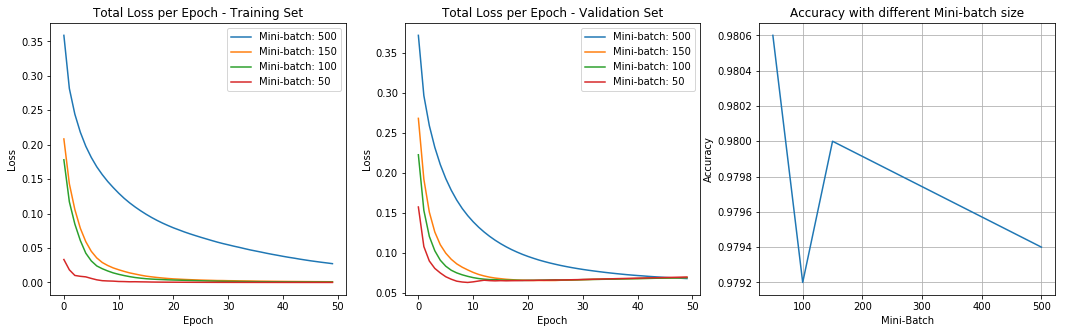

In [45]:
minibatch_arr=[50,100,150,500]
fig, ax = plt.subplots(1,3,figsize=(18, 5))
# plt.xlabel('Epoch')
ax[2].plot(minibatch_arr, acc_arr_0, markevery=1)
ax[2].set_xlabel('Mini-Batch')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Accuracy with different Mini-batch size')
ax[2].grid(True)
ax[0].plot(range(epoch_arr_0[3]), loss_arr_0[3], label='Mini-batch: %s' % str(minibatch_arr[3]))
ax[0].plot(range(epoch_arr_0[2]), loss_arr_0[2], label='Mini-batch: %s' % str(minibatch_arr[2]))
ax[0].plot(range(epoch_arr_0[1]), loss_arr_0[1], label='Mini-batch: %s' % str(minibatch_arr[1]))
ax[0].plot(range(epoch_arr_0[0]), loss_arr_0[0], label='Mini-batch: %s' % str(minibatch_arr[0]))
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Total Loss per Epoch - Training Set')
ax[1].plot(range(epoch_arr_0[3]), loss_arr_valid_0[3], label='Mini-batch: %s' % str(minibatch_arr[3]))
ax[1].plot(range(epoch_arr_0[2]), loss_arr_valid_0[2], label='Mini-batch: %s' % str(minibatch_arr[2]))
ax[1].plot(range(epoch_arr_0[1]), loss_arr_valid_0[1], label='Mini-batch: %s' % str(minibatch_arr[1]))
ax[1].plot(range(epoch_arr_0[0]), loss_arr_valid_0[0], label='Mini-batch: %s' % str(minibatch_arr[0]))
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Total Loss per Epoch - Validation Set')
plt.show()

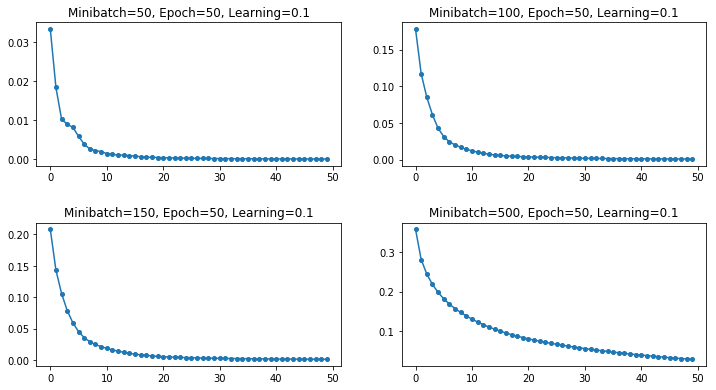

In [52]:
learningrate_arr=[lr_0,lr_0,lr_0,lr_0]
show_graphs(minibatch_arr,epoch_arr_0,learningrate_arr,loss_arr_0)

### We obtain a better accuracy when we choose a smaller Mini-Batch size. 

## * Changing Learning-Rate:

### With different Learning Rates, Epoch=100, Minibath size=50:

In [31]:
x_ds=x_train
y_ds=y_train
x_valid_ds=x_valid
y_valid_ds=y_valid

In [33]:
lr_arr_1=[] #learning rate array.
loss_arr_1=[]   #training loss array
loss_arr_valid_1=[] #valid loss array
epoch_arr_1=[] #epoch array (save the epoch used on each mini-batch)
acc_arr_1=[] # accuracy with validation set array 
epoch_1=50  #total epoch 
mb=50
for i, learningrate in enumerate([0.1,0.01,0.001]):
    loss_array,loss_array_valid,acc_valid,nn_model=hyperparameter_checking(x_ds,y_ds,x_valid_ds,y_valid_ds,epoch_1,mb,learningrate)
    loss_arr_1.append(loss_array)
    loss_arr_valid_1.append(loss_array_valid)
    epoch_arr_1.append(epoch_1)
    acc_arr_1.append(acc_valid)
    print('Accuracy: %s' % str(acc_valid))

x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  7.512006178012875e-05
Accuracy: 0.9812
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  0.005829619528362119
Accuracy: 0.9758
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  0.07506682041932297
Accuracy: 0.941


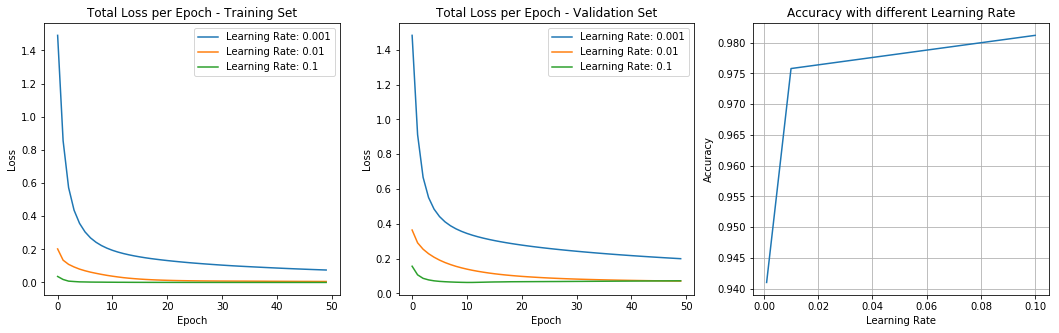

In [44]:
learningrate_arr=[0.1,0.01,0.001]
fig, ax = plt.subplots(1,3,figsize=(18, 5))
# plt.xlabel('Epoch')
ax[2].plot(learningrate_arr, acc_arr_1, markevery=1)
ax[2].set_xlabel('Learning Rate')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Accuracy with different Learning Rate')
ax[2].grid(True)
ax[0].plot(range(epoch_arr_1[2]), loss_arr_1[2], label='Learning Rate: %s' % str(learningrate_arr[2]))
ax[0].plot(range(epoch_arr_1[1]), loss_arr_1[1], label='Learning Rate: %s' % str(learningrate_arr[1]))
ax[0].plot(range(epoch_arr_1[0]), loss_arr_1[0], label='Learning Rate: %s' % str(learningrate_arr[0]))
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Total Loss per Epoch - Training Set')
ax[1].plot(range(epoch_arr_1[2]), loss_arr_valid_1[2], label='Learning Rate: %s' % str(learningrate_arr[2]))
ax[1].plot(range(epoch_arr_1[1]), loss_arr_valid_1[1], label='Learning Rate: %s' % str(learningrate_arr[1]))
ax[1].plot(range(epoch_arr_1[0]), loss_arr_valid_1[0], label='Learning Rate: %s' % str(learningrate_arr[0]))
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Total Loss per Epoch - Validation Set')
plt.show()

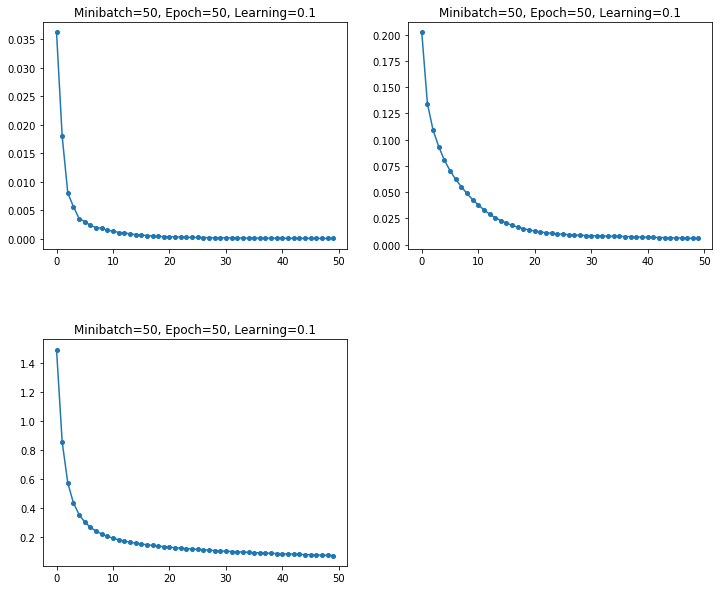

In [53]:
minibatch_arr=[50,50,50]
show_graphs(minibatch_arr,epoch_arr_1,learningrate_arr,loss_arr_1)

### We get a better accuracy if we choose a  lower learning rate. 

## * Changing Epochs:

### With different Epochs, Learning Rates=0.1, Minibath size=50:

In [54]:
x_ds=x_train
y_ds=y_train
x_valid_ds=x_valid
y_valid_ds=y_valid

In [56]:
lr_arr_2=[] #learning rate array.
loss_arr_2=[]   #training loss array
loss_arr_valid_2=[] #valid loss array
epoch_arr_2=[] #epoch array (save the epoch used on each mini-batch)
acc_arr_2=[] # accuracy with validation set array 
learning_rate=0.1
mb=50
for i, epochs in enumerate([30,50,80,100]):
    loss_array,loss_array_valid,acc_valid,nn_model=hyperparameter_checking(x_ds,y_ds,x_valid_ds,y_valid_ds,epochs,mb,learning_rate)
    loss_arr_2.append(loss_array)
    loss_arr_valid_2.append(loss_array_valid)
    epoch_arr_2.append(epochs)
    acc_arr_2.append(acc_valid)
    print('Accuracy: %s' % str(acc_valid))

x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  29  loss  5.580866976877883e-05
Accuracy: 0.9808
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  49  loss  9.588568920537026e-05
Accuracy: 0.981
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  79  loss  4.933418087494992e-05
Accuracy: 0.9824
x.shape =  (55000, 784)
y.shape =  (55000, 10)
epoch  99  loss  3.0394691946729817e-05
Accuracy: 0.981


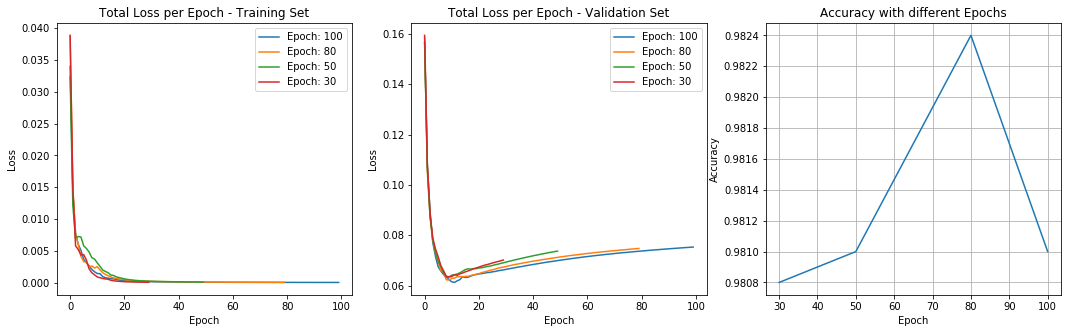

In [64]:
epochs_arr=[30,50,80,100]
fig, ax = plt.subplots(1,3,figsize=(18, 5))
# plt.xlabel('Epoch')
ax[2].plot(epochs_arr, acc_arr_2, markevery=1)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Accuracy')
ax[2].set_title('Accuracy with different Epochs')
ax[2].grid(True)
ax[0].plot(range(epoch_arr_2[3]), loss_arr_2[3], label='Epoch: %s' % str(epochs_arr[3]))
ax[0].plot(range(epoch_arr_2[2]), loss_arr_2[2], label='Epoch: %s' % str(epochs_arr[2]))
ax[0].plot(range(epoch_arr_2[1]), loss_arr_2[1], label='Epoch: %s' % str(epochs_arr[1]))
ax[0].plot(range(epoch_arr_2[0]), loss_arr_2[0], label='Epoch: %s' % str(epochs_arr[0]))
ax[0].legend()
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Total Loss per Epoch - Training Set')
ax[1].plot(range(epoch_arr_2[3]), loss_arr_valid_2[3], label='Epoch: %s' % str(epochs_arr[3]))
ax[1].plot(range(epoch_arr_2[2]), loss_arr_valid_2[2], label='Epoch: %s' % str(epochs_arr[2]))
ax[1].plot(range(epoch_arr_2[1]), loss_arr_valid_2[1], label='Epoch: %s' % str(epochs_arr[1]))
ax[1].plot(range(epoch_arr_2[0]), loss_arr_valid_2[0], label='Epoch: %s' % str(epochs_arr[0]))
ax[1].legend()
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Total Loss per Epoch - Validation Set')
plt.show()

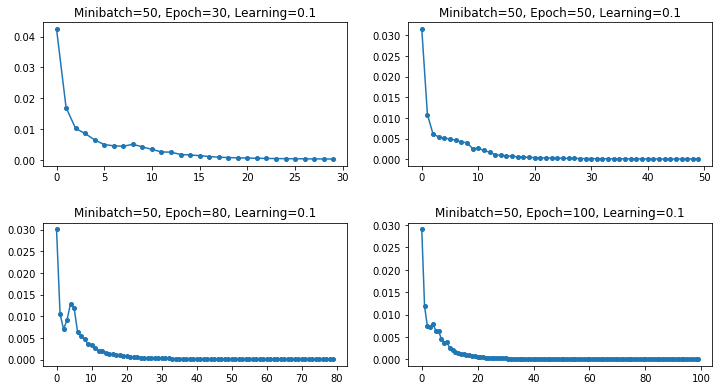

In [62]:
minibatch_arr=[50,50,50,50]
show_graphs(minibatch_arr,epoch_arr_1,learningrate_arr,loss_arr_1)

### The best Accuracy was found with Epoch=80

### The best hyperparameters to train the model are Mini-batch size: 50 and Learning Rate: 0.1 and Epoch:80

## Training the model:

### Training the model with Mini-batch size=50, Epoch=80 and Learning rate=0.1

In [65]:
loss_arr=[]
epochs=80
mb=50
lr=1e-1
x=x_train
y=onehot(y_train,10)
# input_dim, output_dim,hidden_dims,n_hidden=2,mode=',train',
# datapath=None,model_path=None
NN_mbatch_1= NN(784, 10, hidden_dims=(500,300),initialization='glorot')
for epoch in range (epochs): 
    #x, y_onehot, mb_size=100, learning_rate=1e-1, weight_decay=0
    loss_mbatch_1=NN_mbatch_1.train_mbatch(x, y, mb_size=50,learning_rate=0.1)
    print('epoch ', epoch, ' loss ', loss_mbatch_1)

epoch  0  loss  0.033372765869214546
epoch  1  loss  0.012001632675381558
epoch  2  loss  0.007099164011638197
epoch  3  loss  0.0058323673447916455
epoch  4  loss  0.005132461289470667
epoch  5  loss  0.0037353362682975254
epoch  6  loss  0.0025539135952169223
epoch  7  loss  0.002101924585312125
epoch  8  loss  0.002031583025639476
epoch  9  loss  0.0018788617505671981
epoch  10  loss  0.0016528966395528688
epoch  11  loss  0.0013661889375330713
epoch  12  loss  0.001023941007981912
epoch  13  loss  0.0009688538417902192
epoch  14  loss  0.0009226161609923818
epoch  15  loss  0.0007545018373029532
epoch  16  loss  0.000777243142457901
epoch  17  loss  0.0006805585078892702
epoch  18  loss  0.0006402537715541769
epoch  19  loss  0.0005790583429614963
epoch  20  loss  0.0005709708458505316
epoch  21  loss  0.0005193712422951814
epoch  22  loss  0.0004878050054011395
epoch  23  loss  0.00046697763476838834
epoch  24  loss  0.0004363608131288455
epoch  25  loss  0.0004140695637724985
epo

### The accuracy obtained by the model using the training set is:

In [69]:
y_pred=NN_mbatch_1.prediction_mbatch(x_train)
accuracy=NN_mbatch_1.accuracy_mbatch(y_pred,y_train)
print('Accuracy: %s' % str(accuracy))

Accuracy: 1.0


### The accuracy obtained by the model using the testing set is:

In [70]:
y_pred_test=NN_mbatch_1.prediction_mbatch(X_test)
accuracy=NN_mbatch_1.accuracy_mbatch(y_pred_test,Y_test)
print('Accuracy: %s' % str(accuracy))

Accuracy: 0.9833


# =============================================================================================